# Ground State Preparation of SU(2) Lattice Gauge Theory in Quantum Computer

[Kogut-Susskind Hamiltonian](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.11.395) for SU(2) Gauge Theory is:
$$
H = \frac{g^2}{2}\sum_{\rm links} (E_i^a)^2 - \frac{2}{a^2g^2} \sum_{\rm plaquettes} Z({\bf n}) \,,
$$
where, a in the denominator is the lattice spacing and in the superscript denotes SU(2) gauge group indices that are implicitly summer over, g is the gauge coupling constant with mass dimension $[g] = 0.5$ in 2+1 dimensions, $i = x$ or $y$ denotes spatial directions (implicitly summed), $\bf{n} = (n_x, n_y)$ is a a lattice point and $Z(\bf{n})$ is the plaquette operator, $E_i^a$ is the electric field along $i$th spatial direction associated with gauge group index $a$. 

**Mapping onto Spin Chain:**
The Hamiltonian of the SU(2) gauge theory on a plaquette chain with a basis truncated at $j=1/2$ can be mapped onto a quantum spin chain, shown in 
$$ H = \frac{3}{2}g^2\sum_{i=0}^{N-1}\frac{\sigma_i^z+1}{2} - \frac{3}{4}g^2\sum_{i=0}^{N-1}\frac{\sigma_i^z+1}{2}\frac{\sigma_{i+1}^z+1}{2} - \frac{2}{a^2g^2} \sum_{i=0}^{N-1} \big(-0.5\big)^{\frac{\sigma_{i-1}^z+\sigma_{i+1}^z+ 2}{2}}
\sigma_i^x \,.$$
Up to an irrelevant constant, this Hamiltonian can be rewritten as (see Ref. [1](https://arxiv.org/abs/2103.05179) and [2](https://arxiv.org/abs/2205.09247)} for a similar expression)
$$ H_{tot} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z + h_x \sum_{i=0}^{N-1} \frac{1-3\sigma_{i-1}^z}{4} \frac{1-3\sigma_{i+1}^z}{4} \sigma_i^x \, ,$$

That is,
$$ H_{tot} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z + \frac{h_x}{16} \sum_{i=0}^{N-1} ( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z )$$


where $J = -3 g^2/16$, $h_z=3 g^2/8$ and $h_x = -2/(ag)^2$. Under the **periodic boundary condition**, $\sigma_N^i=\sigma_0^i$. The Hamiltonian is rescaled to be unitless and so are the parameters $J$, $h_z$ and $h_x$.

## ADAPT-VQE Algorithm for the Interacting Ground State Preparation

Here, we plan to use ADAPT-VQE algorithm for the ground state preparation of the SU(2) gauge theory in the quantum computer. Find reference here, [ADAPT (Adaptive Derivative-Assembled Problem-Tailored)](https://www.nature.com/articles/s41467-019-10988-2).

The total Hamiltonian is: $H = H_E + H_M$ where,

Electric Hamiltonian:
$$H_{E} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z$$


Magnetic Hamiltonian:
$$H_M = \frac{h_x}{16} \sum_{i=0}^{N-1} ( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z )$$

That is in terms of Pauli's (X, Z),
$$ H_{tot} = \sum_{i=0}^{N-1}  [J Z_i Z_{i+1} + h_z Z_i + \frac{h_x}{16} ( X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1})]$$

where, $J = -3 g^2/16$, $h_z=3 g^2/8$ and $h_x = -2/(ag)^2$. Under the **periodic boundary condition**, $\sigma_N^i=\sigma_0^i$. The Hamiltonian is rescaled to be unitless and so are the parameters $J$, $h_z$ and $h_x$.


Now, let us define the hamiltonian denstiy as,
$ H_i = h_z Z_i + J/2 (Z_i Z_{i+1} + Z_{i-1} Z_i) + hx/16 * (X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1}) $


**ADAPT-VQE Algorithm:**

**Step 1:** Construct a pool of operators $\{\hat{O}_1, \hat{O}_2, ..., \hat{O}_k\}$ constrained by the symmetry of the system. 

The ADAPT-VQE depends on the choice of an efficient and scalable pool of operators. The operators need to be imaginary and anti-symmetric.


First, from the total hamiltonian, we can construct the operator pool $\{\hat{A}_1, \hat{A}_2, ..., \hat{A}_k\}$ that is not "imaginary and antisymmetric", taking the proper commutation of which we can get the operator pool $\{\hat{O}_1, \hat{O}_2, ..., \hat{O}_k\}$. Let's define the (real) operator pool as:

\begin{align*}
\hat{A}_1 &= Z_i \\
\hat{A}_2 &= Z_i Z_{i+1} \\
\hat{A}_3 &= X_i \\
\hat{A}_4 &= Z_{i-1} X_i \\
\hat{A}_5 &= X_i Z_{i+1} \\
\hat{A}_6 &= Z_{i-1} X_i Z_{i+1}
\end{align*}

Then, the operator pool to be used in ADAPT-VQE is:

\begin{align*}
\hat{O}_1 &= \sum_{i = 1}^{N-1} Y_i \\
\hat{O}_2 &= \sum_{i = 1}^{N-1} Y_i Z_{i+1} \\
\hat{O}_3 &= \sum_{i = 1}^{N-1} Z_i Y_{i+1} \\
\hat{O}_4 &= \sum_{i = 1}^{N-1} Z_{i-1} Y_i Z_{i+1} 
\end{align*}


**Step 2:** On the quantum device, initialize the quantum circuit the the current ansatz $\ket{\psi_{ansatz}}$ with desired quantum numbers and the symmetries of the target. The ansatz is dynamically created: $\cdots e^{i \theta_3  \hat{O}_3}e^{i \theta_2 \hat{O}_2}e^{i \theta_1 \hat{O}_1} \ket{\psi_{ref}}$. Here, in our case, let's take the ground state of the electric part of the total hamiltonian as our reference state: $\ket{\psi_{ref}} = \ket{11111 \cdots 11111}$ (all spins down -- obtained by applying X-gate to the initialized (at 0) quantum circuit).

**Step 3:** Each time add one operator that gives the largest gradient magnitude.

Measure the energy gradient $\frac{\partial E}{\partial \theta_i} |_{\theta_i=0}$ with respect to the variational parameter $\theta_i$ of the candidate pool operator $\hat{A}$. Repeat this step for every pool operator. Here, we measure the expectation value of the commutator of hamiltonian with each operator in the pool $\braket{\psi^{(k)}_{ansatz}|[\hat{H},\hat{O_i}]|\psi^{(k)}_{ansatz}} = \frac{\partial E}{\partial \theta_i} |_{\theta_i=0} = [\frac{\partial }{\partial \theta_i} \braket{\psi^{(k)}_{ansatz}|e^{-i \theta_i \hat{O}_i}H e^{i \theta_i \hat{O}_i}|\psi^{(k)}_{ansatz}}]|_{\theta_i=0}$ which gives the estimate of decrease in the energy by transforming the ansatz wavefunction from $\ket{\psi_{ansatz}} \rightarrow e^{i \theta_i \hat{O}}\ket{\psi_{ansatz}}$.

That is to say, add the operator $\hat{P}_n$ with the largest gradient norm to the ansatz with its variational parameter set to zero.

**Step 4:** Perform ordinary VQE to update all ansatz parameters. 

**Step 5:** Repeat steps 1 to 4 until convergence. That is if the measured expectation value is less than the tolerance/threshold $(\epsilon)$, then algorithm terminates as the ADAPT-VQE has converged.


After adding the operators, after k-th iteration, the ansatz has the form:

$\ket{\psi_k} = e^{i \theta_k \hat{O}_k}.....e^{i \theta_2 \hat{O}_2} e^{i \theta_1 \hat{O}_1} \ket{\psi_0} $,

and the energy gradient with respect to the variational parameter of the candidate operator $\hat{O}_i$, $\theta_i$ in the $(k+1)-th$ iteration, using the antihermiticity of the pool operators becomes.

In [1]:
# ## INSTALLATIONS REQUIRED
# !pip install qiskit[visualization]==1.1.0
# !pip install qiskit_aer
# !pip install qiskit qiskit-aer
# !pip install scipy
# !pip install numpy
# !pip install matplotlib
# !pip install qiskit-ibm-runtime

In [2]:
## PYTHON: SCIPY and NUMPY LIBRARIES
import numpy as np
import random
import scipy.linalg as LA
import scipy.sparse as sp
from scipy.linalg import eig, eigh
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import distinctipy
import matplotlib.ticker as ticker

In [32]:
### HAMILTONIAN WITH PERIODIC BOUNDARY CONDITIONS
# Define Pauli matrices in scipy.scparse CSC format
I = sp.csc_array(np.eye(2, dtype=complex))
X = sp.csc_array(np.array([[0, 1], [1, 0]], dtype=complex))
Y = sp.csc_array(np.array([[0, -1j], [1j, 0]], dtype=complex))
Z = sp.csc_array(np.array([[1, 0], [0, -1]], dtype=complex))

# Use a list for Pauli operators
pauli_operators = [X, Y, Z, I]  # List indexed by position: [X, Y, Z, I]

def pauli_string_sparse(pauli_matrices, N, indices):
    """Construct a sparse tensor product for a Pauli string on an N-qubit system in CSC format."""
    # Start with identity matrix
    result = sp.eye(1, dtype=complex, format='csc')  # Identity matrix for the 1-qubit case
    
    # Build the tensor product
    for i in range(N):
        if i in [idx for idx, _ in indices]:
            # Find the corresponding Pauli matrix based on index
            pauli = [p for idx, p in indices if idx == i][0]
        else:
            pauli = 3  # Identity for other qubits (index 3 in the list corresponds to 'I')
        
        result = sp.kron(result, pauli_matrices[pauli], format='csc')  # Tensor product with the current Pauli matrix
    
    return result

def construct_hamiltonian(N, g, a):
    """Constructs the Hamiltonian H_tot in sparse format."""
    
    # Calculate the parameters based on the given formulas
    J = -3 * g**2 / 16
    hz = 3 * g**2 / 8
    hx = -2 / (a * g)**2
    
    # Initialize the Hamiltonian as a sparse matrix
    H = sp.csc_array((2**N, 2**N), dtype=complex)

    # Electric Term: h_z Z_i + J Z_i Z_{i+1}
    for i in range(N):
        H += J * pauli_string_sparse(pauli_operators, N, [(i, 2), ((i + 1) % N, 2)])  # Z_i Z_{i+1}, index 2 is Z
        H += hz * pauli_string_sparse(pauli_operators, N, [(i, 2)])  # Z_i, index 2 is Z       

    # Magnetic Term: h_x / 16 ( X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1})
    for i in range(N):
        # X_i
        H += (hx / 16) * pauli_string_sparse(pauli_operators, N, [(i, 0)])  # X_i, index 0 is X

        # -3 Z_{i-1} X_i
        H += (-3 * hx / 16) * pauli_string_sparse(pauli_operators, N, [((i - 1) % N, 2), (i, 0)])  # Z_{i-1} X_i

        # -3 X_i Z_{i+1}
        H += (-3 * hx / 16) * pauli_string_sparse(pauli_operators, N, [(i, 0), ((i + 1) % N, 2)])  # X_i Z_{i+1}

        # +9 Z_{i-1} X_i Z_{i+1}
        H += (9 * hx / 16) * pauli_string_sparse(pauli_operators, N, [((i - 1) % N, 2), (i, 0), ((i + 1) % N, 2)])  # Z_{i-1} X_i Z_{i+1}

    return H


### DEFINE OPERATOR POOL {\sum_i Y_i, \sum_i Y_i Z_{i+1}, \sum_i Z_i Y_{i+1}, \sum_i Z_{i-1} Y_i Z_{i+1}}
def define_operator_pool(N):
    """
    Define the operator pool for a given lattice site and number of qubits using CSC format.
    
    Parameters:
    N (int): The number of qubits (spins).

    Returns:
    list: A list of sparse operators in the operator pool.
    """
    
    # Initialize operator pool as a list
    operator_pool = []

    # Sum_i Y_i operators
    Y_sum = sp.csc_array((2**N, 2**N), dtype=complex)  # Start with a zero matrix
    for i in range(N):
        Y_sum += pauli_string_sparse(pauli_operators, N, [(i, 1)])  # Y_i, index 1 is Y
    operator_pool.append(Y_sum)

    # Sum_i Y_i Z_{i+1} operators
    YZ_sum = sp.csc_array((2**N, 2**N), dtype=complex)  # Start with a zero matrix
    for i in range(N):
        YZ_sum += pauli_string_sparse(pauli_operators, N, [(i, 1), ((i + 1) % N, 2)])  # Y_i Z_{i+1}, index 1 is Y, 2 is Z
    operator_pool.append(YZ_sum)

    # Sum_i Z_i Y_{i+1} operators
    ZY_sum = sp.csc_array((2**N, 2**N), dtype=complex)  # Start with a zero matrix
    for i in range(N):
        ZY_sum += pauli_string_sparse(pauli_operators, N, [(i, 2), ((i + 1) % N, 1)])  # Z_i Y_{i+1}, index 2 is Z, 1 is Y
    operator_pool.append(ZY_sum)

    # Sum_i X_i Y_{i+1} operators
    XY_sum = sp.csc_array((2**N, 2**N), dtype=complex)  # Start with a zero matrix
    for i in range(N):
        XY_sum += pauli_string_sparse(pauli_operators, N, [(i, 0), ((i + 1) % N, 1)])  # X_i Y_{i+1}, index 0 is X, 1 is Y
    operator_pool.append(XY_sum)

    # Sum_i Y_i X_{i+1} operators
    YX_sum = sp.csc_array((2**N, 2**N), dtype=complex)  # Start with a zero matrix
    for i in range(N):
        YX_sum += pauli_string_sparse(pauli_operators, N, [(i, 1), ((i + 1) % N, 0)])  # Y_i X_{i+1}, index 1 is Y, 0 is X
    operator_pool.append(YX_sum)


    # Sum_i Z_{i-1} Y_i Z_{i+1} operators
    ZYZ_sum = sp.csc_array((2**N, 2**N), dtype=complex)  # Start with a zero matrix
    for i in range(N):
        ZYZ_sum += pauli_string_sparse(pauli_operators, N, [((i - 1) % N, 2), (i, 1), ((i + 1) % N, 2)])  # Z_{i-1} Y_i Z_{i+1}
    operator_pool.append(ZYZ_sum)

    return operator_pool

## Define Initial State: Ground State (GS) of Electric Hamiltonian
def ground_state_electric_hamiltonian(N):
    """
    Construct the ground state of the electric Hamiltonian as a tensor product of N qubits in the |0> state.
    
    Parameters:
    N (int): The number of qubits (spins).
    
    Returns:
    np.ndarray: The ground state vector of the electric Hamiltonian in the computational basis.
    """
    
    # Define the |0> state as a column vector: Opposite of what qiskit gives
    zero_state = np.array([[0], [1]], dtype=complex)
    
    # Initialize the ground state by performing the Kronecker product for all N qubits
    ground_state = zero_state
    for _ in range(1, N):
        ground_state = np.kron(ground_state, zero_state)
    
    return ground_state

## prepare a state
def prepare_state(operator_index, parameter, operator_pool, psi_initial):
    """
    Prepare the state by applying the exponential of the selected operator with its parameter to the reference state.
    
    Parameters:
    operator_index (int): Index of the operator to apply from the operator pool.
    parameter (float): Parameter for the selected operator.
    operator_pool (list): List of operators from which to construct the new state.
    psi_initial (np.ndarray): The initial reference state.
    
    Returns:
    np.ndarray: The new state after applying the exponential of the selected operator.
    """
    # Select the operator from the pool
    selected_operator = operator_pool[operator_index]
    
    # Initialize the generator as a sparse matrix
    generator = sp.csc_matrix((len(psi_initial), len(psi_initial)), dtype=complex)
    
    # Add the selected operator scaled by the parameter to the generator
    generator += parameter * selected_operator

    # Apply the exponential to the initial state
    new_state = sp.linalg.expm_multiply(sp.linalg.expm(1j * generator), psi_initial)
    
    return new_state

## Expectation value <psi | Obs | psi> 
def expectation_value(obs, psi):
    """Calculate the energy expectation value <psi|H|psi>."""
    # Normalize the state
    norm_psi = np.linalg.norm(psi)
    if norm_psi == 0:
        return np.inf  # Avoid division by zero
    psi_normalized = psi / norm_psi
    
    # Calculate the expectation value
    exp_val = np.real(psi_normalized.conj().T @ obs @ psi_normalized)
    
    return exp_val.flatten()[0].real

## Define VQE Cost Function: <psi(param) | H_tot | psi(param)
def vqe_cost_function(parameter, operator_idx, psi_ref, operator_pool, H_tot):
    """
    Cost function for VQE: <psi(param) | H_tot | psi(param)>
    param: the current parameter to optimize
    max_grad_idx: index of the operator with the largest gradient
    psi_ref: the reference state
    operator_pool: pool of available operators
    H_tot: total Hamiltonian
    """
    # Prepare the state using the current parameter and the selected operator
    psi_param = prepare_state(operator_idx, parameter, operator_pool, psi_ref)
    
    # Compute the expectation value <psi_param | H_tot | psi_param>
    cost = expectation_value(H_tot, psi_param)
    return cost

## Measure the Gradient <psi | i[H_tot, O_i] | psi> for an operator O_i in the pool
def measure_gradient(hamiltonian, operator_pool, psi):
    gradients = []
    for operator in operator_pool:
        commutator = 1j * (hamiltonian @ operator - operator @ hamiltonian)
        grad_val = expectation_value(commutator, psi)
        grad_val = np.linalg.norm(grad_val)
        gradients.append(grad_val)
    return gradients

In [33]:
### CHECKING THE CONSISTENCY OF THE CODE

### Define constants
N = 5  # Number of spins

# coupling constants 
g = 1.0
a = 1.0  

# define initial state
psi_ref = ground_state_electric_hamiltonian(N)
# psi_ref = prepare_state(1, -0.331524852891385, operator_pool, psi_init)
# psi_ref = prepare_state(3, 2.952149880509002, operator_pool, psi_ref)

## define operator pool
operator_pool = define_operator_pool(N)

# ## CALCULATE THE HAMILTONIAN
## Total Hamiltonian Using Sparse Matrices
H_tot = construct_hamiltonian(N, g, a)

#### FIND EXACT GROUND STATE OF HAMILTONIAN 
## Using scipy.sparse.linalg.eigs
eigenvals, eigenvecs = sp.linalg.eigs(H_tot)
index_gs = np.argmin(eigenvals)
real_gs = eigenvals[index_gs]
print("Exact GS Energy of The Total Hamiltonian Using Scipy Sparse: ", real_gs.real)

gradients = measure_gradient(H_tot, operator_pool, psi_ref)

print("Gradient of Operators: ", gradients)

## TESTING VQE OPTIMIZATION
initial_param = 0.1
op_idx = 0 ## \sum_i Y_i
opt_result = minimize(vqe_cost_function, initial_param, args=(op_idx, psi_ref, operator_pool, H_tot), method='COBYLA')
optimized_param = opt_result.x[0]
print(f"Optimized theta values: {optimized_param}")
print(f"Cost function after optimization: {opt_result.fun}")

Exact GS Energy of The Total Hamiltonian Using Scipy Sparse:  -8.03731242379932
Gradient of Operators:  [20.0, 20.0, 20.0, 0.0, 0.0, 20.0]
Optimized theta values: 0.246284375
Cost function after optimization: -5.529966970630027


================++++++++================>>> PERFORMING ADAPT-VQE <<<===============++++++++==================
Spins (N): 5, Coupling (g) : 1.0
INIT REFERENCE STATE: GS of H_E
INIT REF STATE: Applied \Prod_i Exp(-i * 0.30219728932326667 * Y) to GS of H_E !!!
==================>>> STEP 1 : DEFINE OPERATOR POOL
 --------------------------------------------------------------------------
 --------------------------------------------------------------------------
Total Number of Iterations = 10
 --------------------------------------------------------------------------


 --------------------------------------------------------------------------
                         ADAPT-VQE iteration:  0
 --------------------------------------------------------------------------


==================>>> STEP 2 : INITIALIZE THE ANSATZ
==================>>> STEP 3 : CALCULATING GRADIENT OF OPERATORS
Gradients:  [6.847795911885457, 8.470737147972976, 8.470737147972976, 2.2886082531763954, 2.288608253176395

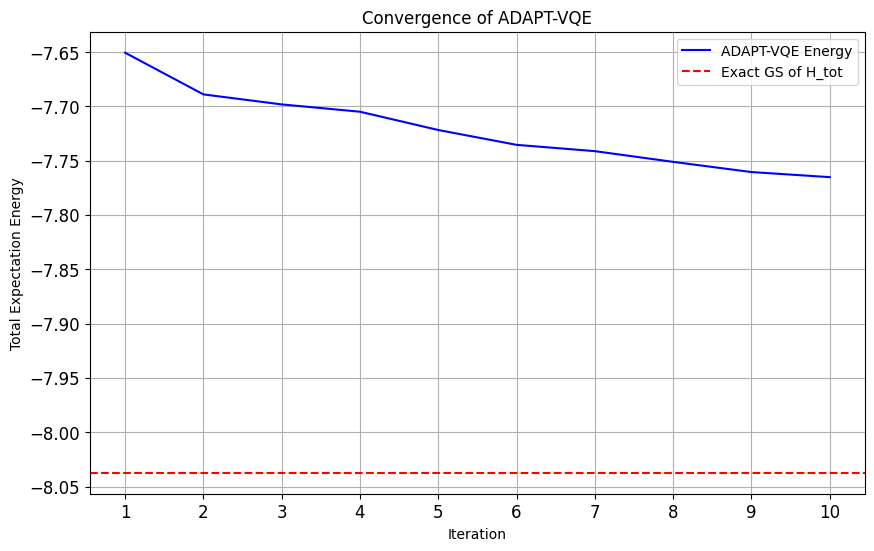

In [38]:
################ PERFORMING ADAPT-VQE ####################
### Define constants
N = 5 # Number of spins
a = 1.0  # Lattice spacing
g = 1.0 # coupling constants 

# Calculate Hamiltonian
# print("=============================>>> Hamiltonian <<<================================")
H_tot = construct_hamiltonian(N, g, a)
# print("="*50)
# print("Total Hamiltonian: ", H_tot)
# print("="*50)
# ### FIND EXACT GROUND STATE OF HAMILTONIAN ###
# print("Exact Ground State Energy of The Total Hamiltonian: ", energy_realgs)
eigenvals, eigenvecs = sp.linalg.eigs(H_tot)
index_gs = np.argmin(eigenvals)
exact_gs = eigenvals[index_gs]

print("================++++++++================>>> PERFORMING ADAPT-VQE <<<===============++++++++==================")
print(f"Spins (N): {N}, Coupling (g) : {g}")

## Operator Pool
operator_pool = define_operator_pool(N)

print("INIT REFERENCE STATE: GS of H_E")
psi_init = ground_state_electric_hamiltonian(N)
print("INIT REF STATE: Applied \Prod_i Exp(-i * 0.30219728932326667 * Y) to GS of H_E !!!")
psi_init = prepare_state(0, 2.857428493968606, operator_pool, psi_init)

## ADAPT - VQE
tolerance = 1e-3 # convergence threshold
n_iter = 10 # no of iterations

# STEP 1: Operator Pool
print("==================>>> STEP 1 : DEFINE OPERATOR POOL")
operator_pool = define_operator_pool(N)
# print("Operator Pool: ", operator_pool)
print(" --------------------------------------------------------------------------")
# Initialize lists to store iteration & expectation values
iterations = []
expectation_energies = []
# theta_vals = []  # Start with an empty list for theta values
selected_operators = []  # To keep track of already selected operators
last_applied_operator = None # Initialize a variable to store the last applied operator index

# Parameters
optimized_parameters = [0,0,0,0,0,0]

print(" --------------------------------------------------------------------------")
print(f"Total Number of Iterations = {n_iter}" )
print(" --------------------------------------------------------------------------")

## MAIN LOOP for ADAPT-VQE
for iteration in range(n_iter):
    print("\n")
    print(" --------------------------------------------------------------------------")
    print("                         ADAPT-VQE iteration: ", iteration)
    print(" --------------------------------------------------------------------------")
    print("\n")
    ### STEP 2: Initialize Ansatz (and output ansatz info)
    print("==================>>> STEP 2 : INITIALIZE THE ANSATZ")
    psi_ref = psi_init
    
    ### STEP 3: Measure the gradient (commutator expectation value) for each operator
    print("==================>>> STEP 3 : CALCULATING GRADIENT OF OPERATORS")
    gradients = measure_gradient(H_tot, operator_pool, psi_ref)
    print("Gradients: ", gradients)
    print("Maximum Gradient: ", np.max(gradients))

    ### STEP 4: Find the operator with the largest commutator / Gradient
    print("==================>>> STEP 4 : FINDING THE MAXIMUM GRADIENT OPERATOR")
    max_grad_idx= np.argmax(gradients)
    max_gradient = gradients[max_grad_idx]
    print(f"Operator Index with largest gradient: {max_grad_idx}, Gradient: {max_gradient}")

    # Compare with the last applied operator
    if last_applied_operator is not None:
        if max_grad_idx == last_applied_operator:
            print(f"Warning: The current operator at index ({max_grad_idx}) is the same as the last applied operator.")
            
            # Find the operator with the second largest gradient
            sorted_indices = np.argsort(gradients)[::-1]  # Sort gradients in descending order
            for idx in sorted_indices:
                if idx != last_applied_operator:
                    max_grad_idx = idx
                    max_gradient = gradients[max_grad_idx]
                    print(f"Applying the second largest gradient operator instead: {max_grad_idx}, Gradient: {max_gradient}")
                    break
        else:
            print(f"Applying the operator with the largest gradient as it is different from the last applied one.")
    else:
        print("This is the first iteration, so no previous operator to compare with.")

    # Update the last applied operator to the current one
    last_applied_operator = max_grad_idx

    # Store the chosen operators
    selected_operators.append(max_grad_idx)
    
    if np.linalg.norm(gradients) < tolerance:
        print(f"Terminating: Pool Gradient Norm: {np.linalg.norm(gradients)} is below the threshold: {tolerance}.")
        break            
  
    ### STEP 5: Use VQE to optimize theta values
    print("==================>>> STEP 5 : PERFORMING VQE: Minimizing Cost & Optimizing Parameters")
    ### PERFORM VQE: Optimizing the parameters: Minimize the Cost

    ## Optimize the new Params value for the selected operator
    ## scipy.optimize.minimize(func, x0, ...) or scipy.optimize.basinhopping
    ## other options available: L-BFGS-B, COBYLA, BFGS, etc 
    initial_param = 0.1
    opt_result = minimize(vqe_cost_function, initial_param, args=(max_grad_idx, psi_ref, operator_pool, H_tot), method='L-BFGS-B')
    optimized_param = opt_result.x[0]
    print(f"Optimized theta values: {optimized_param}")
    print(f"Cost function after optimization: {opt_result.fun}")

    # update optimized_theta value
    optimized_parameters[max_grad_idx] = optimized_param
    
    ### STEP 6: Update the ansatz with the operator that has the largest gradient
    # bind parameters to create an optimized circuit
    print("==================>>> STEP 6 : UPDATING ANSATZ WITH OPTIMIZED PARAMETERS")
    psi_ref = prepare_state(max_grad_idx, optimized_param, operator_pool, psi_ref)
    psi_init = psi_ref
    
    # Store the iteration number and the expectation value
    iterations.append(iteration + 1)
    
    expectation_energies.append(opt_result.fun.real)

    ### CHECK CONVERGENCE
    if np.abs(opt_result.fun - exact_gs) < tolerance:
        print("="*25)
        print(f"SUCCESSFULLY CONVERGED!!!")
        break
    else:
        print(f">>> Did NOT converge in {iteration+1} iterations! <<<")

print("================++++================>>> ADAPT-VQE DONE <<<===============++++++++==================")
## final optimized parameters
print(f"\n Final Optimized Parameters: {optimized_parameters}")
# Final energy results
final_cost = expectation_value(H_tot, psi_ref)
print(f"\n Final Expectation Value of the Total Hamiltonian: {final_cost}")

# ### FIND EXACT GROUND STATE OF HAMILTONIAN ###
print("-"*100)
print("Exact GS Energy of The Total Hamiltonian: ", exact_gs.real)
print("-"*100)
print("\n")

print("===>>>> PLOTTING THE RESULTS:")
# Plotting the convergence of ADAPT-VQE
# Select a subset of iterations for xticks
num_ticks = 10 
tick_positions = np.linspace(min(iterations), max(iterations), num_ticks, dtype=int)

# Plotting the convergence of ADAPT-VQE
plt.figure(figsize=(10, 6))
plt.plot(iterations, expectation_energies, linestyle='-', color='b', label='ADAPT-VQE Energy')
plt.axhline(y=exact_gs, color='r', linestyle='--', label='Exact GS of H_tot')
plt.xlabel('Iteration')
plt.xticks(tick_positions, fontsize=12)  # Use the selected subset for xticks
plt.yticks(fontsize=12)
plt.ylabel('Total Expectation Energy')
plt.title('Convergence of ADAPT-VQE')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig(f'Classical_ADAPT_VQE_convergence_Spins{N}_Iters{n_iter}_g{g}.png', dpi=300)  # Save as PNG with 300 dpi

# Show the figure
plt.show()

In [130]:
# ### Energy Expectation Value vs Theta (parameter)

# ## Define constants
# N = 5  # Number of spins

# # coupling constants 
# g = 1.0
# a = 1.0  

# # total hamiltonian
# hamiltonian_tot = construct_hamiltonian(N, g, a)

# ### Reference State
# psi_initial = ground_state_electric_hamiltonian(N)

# # operator pool
# operator_pool = define_operator_pool(N)

# ## Exact Exp Value of Total Energy
# eigenvals, eigenvecs = sp.linalg.eigs(hamiltonian_tot)
# index_gs = np.argmin(eigenvals)
# real_gs = eigenvals[index_gs]
# # print("Exact GS Energy of The Total Hamiltonian: ", real_gs.real)

# # Parameters for plotting
# operator_index = 0  # Index of the operator to apply
# parameter_values = np.linspace(-np.pi, np.pi, 200) # Range of parameter values
# energy_expectation_values = []  # To store expectation values

# # Loop over parameter values
# for parameter in parameter_values:
#     # Prepare the new state
#     psi_ref = prepare_state(operator_index, parameter, operator_pool, psi_initial)

#     # Calculate expectation value of the total Hamiltonian
#     energy_exp_val = energy_expectation_value(hamiltonian_tot, psi_ref)
#     energy_expectation_values.append(energy_exp_val)

# # Find the parameter corresponding to the minimum expectation value
# min_index = np.argmin(energy_expectation_values)
# min_parameter = parameter_values[min_index]
# min_energy = energy_expectation_values[min_index]

# # Print the results
# print(f"Parameter corresponding to minimum expectation value: {min_parameter}")
# print(f"Minimum expectation value of the total Hamiltonian: {min_energy}")


# # Plotting the results
# plt.figure(figsize=(10, 6))
# plt.plot(parameter_values, energy_expectation_values, marker='o', label='< psi_ref | H_tot | psi_ref >')
# plt.xlabel('Parameter Value')
# plt.ylabel('Energy')
# plt.title('Expectation Value of Total Hamiltonian vs Parameter')
# plt.axhline(y=real_gs.real, color='r', linestyle='--', label='Exact GS Energy of H_tot')
# plt.legend()
# plt.grid()
# plt.savefig(f'Energy vs Parameter After Applying Prod_i Exp(- i theta_0 Y)_to_GSofH_E_g={g}.pdf')
# plt.show()

In [131]:
# ### Define constants
# N = 5  # Number of spins

# # coupling constants 
# g = 1.0
# a = 1.0  

# # total hamiltonian
# hamiltonian_tot = construct_hamiltonian(N, g, a)

# # operator pool
# operator_pool = define_operator_pool(N)

# ### Reference State: applying \exp( i theta_0 \sum_i Y_i) to |GS OF H_E>
# psi_initial = ground_state_electric_hamiltonian(N)
# psi_ref1 = prepare_state(0, 2.857428493968606, operator_pool, psi_initial)

# ## Exact Exp Value of Total Energy
# eigenvals, eigenvecs = sp.linalg.eigs(hamiltonian_tot)
# index_gs = np.argmin(eigenvals)
# real_gs = eigenvals[index_gs]
# # print("Exact GS Energy of The Total Hamiltonian: ", real_gs.real)

# # Parameters for plotting
# parameter_values = np.linspace(-np.pi, np.pi, 200) # Range of parameter values
# energy_expectation_values = []  # To store expectation values

# # Loop over parameter values
# for parameter in parameter_values:
#     # Prepare the new state
#     operator_index = 3 ## applying \exp( i theta_3 \sum_i ZYZ)
#     psi_ref = prepare_state(operator_index, parameter, operator_pool, psi_ref1)

#     # Calculate expectation value of the total Hamiltonian
#     energy_exp_val = energy_expectation_value(hamiltonian_tot, psi_ref)
#     energy_expectation_values.append(energy_exp_val)

# # Find the parameter corresponding to the minimum expectation value
# min_index = np.argmin(energy_expectation_values)
# min_parameter = parameter_values[min_index]
# min_energy = energy_expectation_values[min_index]

# # Print the results
# print(f"Parameter corresponding to minimum expectation value: {min_parameter}")
# print(f"Minimum expectation value of the total Hamiltonian: {min_energy}")

# # Plotting the results
# plt.figure(figsize=(10, 6))
# plt.plot(parameter_values, energy_expectation_values, marker='o', label='< psi_ref | H_tot | psi_ref >')
# plt.xlabel('Parameter Value')
# plt.ylabel('Energy')
# plt.title('Expectation Value of Total Hamiltonian vs Parameter')
# plt.axhline(y=real_gs.real, color='r', linestyle='--', label='Exact GS Energy of H_tot')
# plt.legend()
# plt.grid()
# plt.savefig(f'Energy vs Parameter After Applying Prod_i Exp(- i theta_3 ZYZ)_to_GSofH_E_g={g}.pdf')
# plt.show()